# Image classification

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.Resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE=[224,224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 45s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders=glob('Datasets/train/*')

In [9]:
import os

In [10]:
os.chdir(r'E:\myPython\Car Brand Classification')

In [12]:
len(folders)

3

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
2/2 [==============================] - 15s 8s/step - loss: 3.2265 - accuracy: 0.4375 - val_loss: 8.9750 - val_accuracy: 0.1552
Epoch 2/30
2/2 [==============================] - 12s 6s/step - loss: 4.0127 - accuracy: 0.3750 - val_loss: 2.5994 - val_accuracy: 0.5345
Epoch 3/30
2/2 [==============================] - 12s 6s/step - loss: 3.4931 - accuracy: 0.3906 - val_loss: 1.5414 - val_accuracy: 0.3793
Epoch 4/30
2/2 [==============================] - 12s 6s/step - loss: 1.5049 - accuracy: 0.4844 - val_loss: 2.9660 - val_accuracy: 0.1552
Epoch 5/30
2/2 [==============================] - 12s 6s/step - loss: 2.2130 - accuracy: 0.4531 - val_loss: 1.0989 - val_accuracy: 0.5690
Epoch 6/30
2/2 [==============================] - 12s 6s/step - loss: 1.2566 - accuracy: 0.5000 - val_loss: 2.2822 - val_accuracy: 0.3276
Epoch 7/30
2/2 [==============================] - 12s 6s/step - loss: 1.2025 - accuracy: 0.4219 

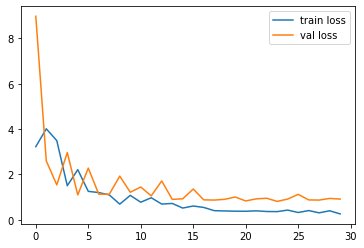

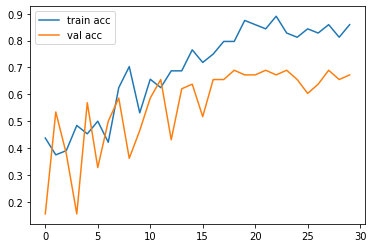

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[5.95872879e-01, 2.38700360e-01, 1.65426672e-01],
       [8.07933435e-02, 9.08933878e-01, 1.02727702e-02],
       [4.53610383e-02, 9.39751506e-01, 1.48874596e-02],
       [4.54354733e-01, 2.06707329e-01, 3.38937938e-01],
       [1.20722863e-03, 9.93883014e-01, 4.90984041e-03],
       [2.25082204e-01, 1.61121655e-02, 7.58805692e-01],
       [2.88841605e-01, 3.95010561e-02, 6.71657264e-01],
       [2.58466393e-01, 5.44216871e-01, 1.97316706e-01],
       [1.33737046e-02, 9.84046102e-01, 2.58013885e-03],
       [9.62292314e-01, 2.76116692e-02, 1.00960098e-02],
       [1.39189465e-02, 9.83116627e-01, 2.96441629e-03],
       [1.08707286e-01, 6.18002355e-01, 2.73290336e-01],
       [1.20634273e-01, 7.81085253e-01, 9.82804373e-02],
       [3.56952786e-01, 4.35355842e-01, 2.07691401e-01],
       [9.25463140e-01, 6.47487715e-02, 9.78807546e-03],
       [8.63582373e-01, 1.64233260e-02, 1.19994223e-01],
       [4.05812562e-01, 5.37137926e-01, 5.70494644e-02],
       [5.43606579e-02, 1.04329

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_resnet50.h5')

In [30]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [31]:

x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[1.5213194e-03, 8.9561916e-04, 9.9758303e-01]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:

a==1

array([False])